In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("NumPy version:", np.__version__)
print("Everything works!")


NumPy version: 2.3.1
Everything works!


In [5]:
x = pd.read_csv(r"C:\Users\samer\OneDrive\Desktop\ict\۲۰۲۶\لب\LAB 1\parkinsons_updrs_av.csv")
 #use linear regression to predict total UPDRS from a set of voice parameters and other features

In [6]:
features=list(x.columns) #feature ha ro joda mikone
print(features)

['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']


In [7]:
subj=pd.unique(x['subject#'])  #feature haye unique ro joda mikone 
print("the number of distinct patients in the dataset is:",len(subj))  #tedad bimaran ro dar miyare

the number of distinct patients in the dataset is: 42


In [8]:
X=pd.DataFrame()
for k in subj:
    xk=x[x['subject#']==k]                                                  #data of user k
    xk1=xk.copy()                                                           #we modify the values of xk(next lines)
    xk1.test_time=xk1.test_time.astype(int)                                 #remove decimal values
    xk1['g']=xk1['test_time']                                               #add a new feature
    v=xk1.groupby('g').mean()                                               #group according to the new feature # which is removed
    X=pd.concat([X,v],axis=0,ignore_index=True)                             #append new data to X
features=list(x.columns)
print("The dataset shape after the mean is ",X.shape)
print("The features of the dataset is ",len(features))
print(features)
Np,Nc=X.shape                                                               # Np=number of rows or patients ,  Nc=number of columns or features+1
                                                                            

The dataset shape after the mean is  (990, 22)
The features of the dataset is  22
['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']


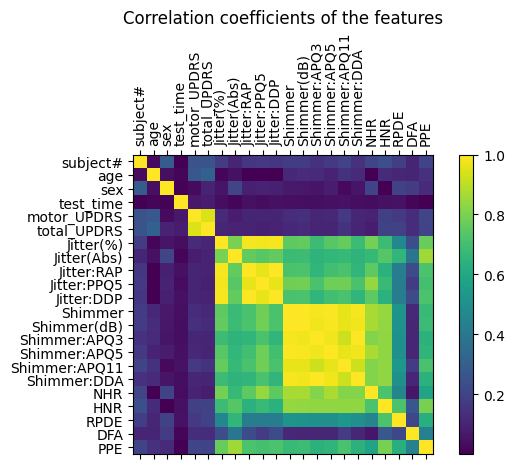

In [9]:
Xnorm=(X-X.mean())/X.std()                      #normalize the entire dataset -mean of eache column minus the element itself centers dataset around 0
print('')
c=Xnorm.cov()                                   #measure the covariance #we need to find the relation between two features 
plt.figure()
plt.matshow(np.abs(c.values),fignum=0)
plt.xticks(np.arange(len(features)),features,rotation=90)
plt.yticks(np.arange(len(features)),features,rotation=0)
plt.colorbar()
plt.title('Correlation coefficients of the features')
plt.tight_layout()
plt.savefig('./corr_coef.png') #save the figure
plt.show()


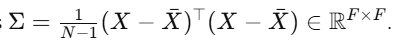 Feature Covariance

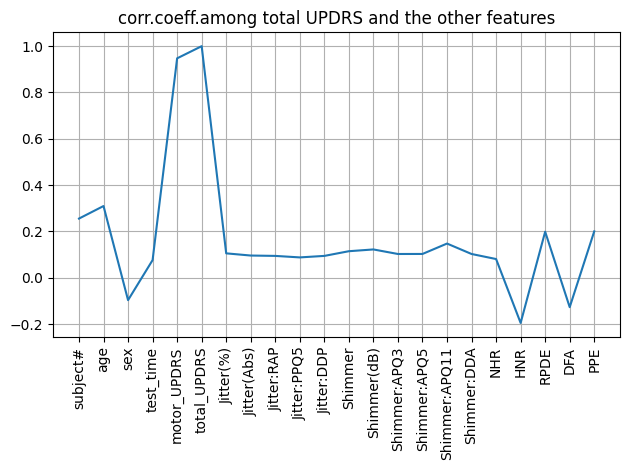

In [10]:
plt.figure()
c.total_UPDRS.plot()
plt.grid()
plt.xticks(np.arange(len(features)),features,rotation=90)
plt.title('corr.coeff.among total UPDRS and the other features')
plt.tight_layout()
plt.show()

so motor DDPRS is correlated to total_UDPRS and we need to remove it 

To Do

In [11]:
#np.random.seed(101)                                            #first solution to shuffle the data
np.random.seed(328103)                                          #To do 1
indexsh=np.arange(Np)
np.random.shuffle(indexsh)                                      #we do shuffle to avoid that the data of only first patient appears in trainig dataset
Xsh=X.copy(deep=True)
Xsh=Xsh.set_axis(axis=0,labels=indexsh)
Xsh=Xsh.sort_index(axis=0)


In [12]:
#Xsh=X.sample(frac=1,replace=False,random_state=272,axis=0,ignore_index=True) #second solution

Train

In [13]:
Ntr=int(Np*0.5)              #number of training points   **** we split Train and Test 
Nte=Np-Ntr                   #number of test points
X_tr=Xsh[0:Ntr]              #dataframe that contains only the training data
mm=X_tr.mean()               #mean of the training data
ss=X_tr.std()                #standard deviation of the training data
my=mm['total_UPDRS']         #mean of total UPDRS *** because we want to find the colleniarity between features and specific feature(total-UPDRS)
sy=ss['total_UPDRS']         #st.dev of total UPDRS

In [14]:
Xsh_norm=(Xsh-mm)/ss                     #normalize data
ysh_norm=Xsh_norm['total_UPDRS']         #regressand is total UPDRS is target value
Xsh_norm=Xsh_norm.drop(['total_UPDRS','subject#'],axis=1)                       #regressors are other features **we remove these two features
#Xsh_norm = Xsh_norm.drop(['Jitter:DDP', 'Shimmer:DDA'], axis=1)                #To do 2

include_motor_updrs = True                # Change this variable to drop Motor UPDRS To do 5
if not include_motor_updrs:
    Xsh_norm=Xsh_norm.drop('motor_UPDRS',axis=1)

X_tr_norm=Xsh_norm[0:Ntr]                #training regressors which is normalized now  ***other features 
X_te_norm=Xsh_norm[Ntr:]                 #test regressors 
y_tr_norm=ysh_norm[0:Ntr]                #training    regressand 
y_te_norm=ysh_norm[Ntr:]                 #test regressand

#we can have Validation which would be a part of Train dataset 

w_hat=np.linalg.inv(X_tr_norm.T@X_tr_norm)@(X_tr_norm.T@y_tr_norm) #LLS   

$\hat{w} = (X^TX)^-1 - X^TY$   
$\hat{w}=argmin||Xw-Y||^2 / N$             
This is the LLS formula

w_hat represent the linear relationship between the predictor variables and the target variable total_UPDRS.

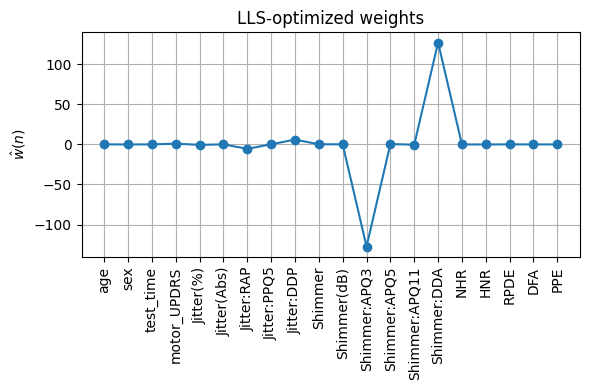

In [15]:

Nf=len(w_hat)  #we want to design a plot based on the number of w hat
nn=np.arange(Nf)
plt.figure(figsize=(6,4))
plt.plot(nn,w_hat,'-o')
plt.xticks(nn,X_tr_norm,rotation=90)
plt.ylabel(r'$\^w(n)$')
plt.title('LLS-optimized weights')
plt.grid()
plt.tight_layout()
plt.savefig('./LLS-what.png')
plt.show()

The weights associated with "Shimmer:DDA" are very large and opposite signs.

In [16]:
y_hat_te_norm=X_te_norm@w_hat   #w-hat=X*w
y_hat_tr_norm=X_tr_norm@w_hat

y_hat_te=y_hat_te_norm*sy+my     #normalized value=(y_hat_te_norm)-mean/ std      original value=normalized value*std+mean   ***do it for predicted y
y_te=y_te_norm*sy+my             #do it for actual y 


                                 #***we do it also for train  because we want to find out about the overfitting
y_hat_tr=y_hat_tr_norm*sy+my     #do it for predicted y   
y_tr=y_tr_norm*sy+my             #do it for actual y

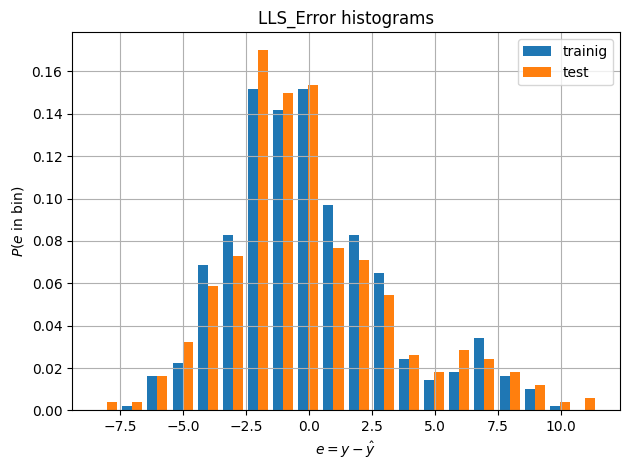

In [17]:
E_tr=(y_tr-y_hat_tr) #training
E_te=(y_te-y_hat_te) #test
e=[E_tr,E_te]
plt.Figure(figsize=(6,4))
plt.hist(e,bins=20,density=True,histtype='bar',label=['trainig','test'])
label=(['training','test'])
plt.xlabel(r'$e=y-\^y$')
plt.ylabel(r'$P(e$ in bin$)$')
plt.legend()
plt.grid()
plt.title('LLS_Error histograms')
plt.tight_layout()
plt.show()

Lower errors in training set compare to test set

not musch difference between test and train --> no overfitting


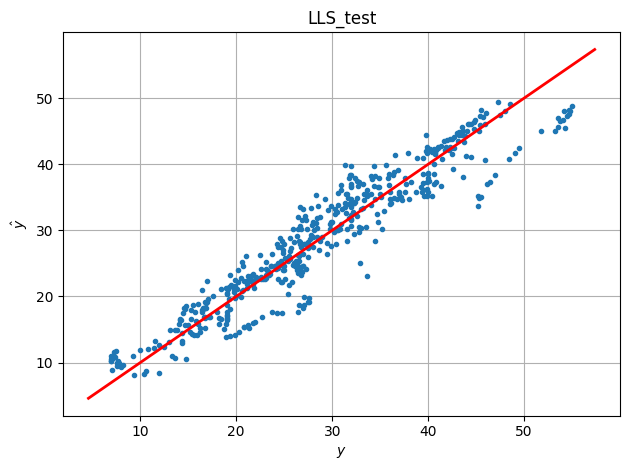

In [18]:
y_hat_te=(X_te_norm@w_hat)*sy+my
y_te=y_te_norm*sy+my
plt.Figure(figsize=(6,4))
plt.plot(y_te,y_hat_te,'.')
v=plt.axis()
plt.plot([v[0],v[1]],[v[0],v[1]],'r',linewidth=2)
plt.xlabel(r'$y$')
plt.ylabel(r'$\^y$')
plt.grid()
plt.title('LLS_test')
plt.tight_layout()
plt.show()

$Important-parameters$ ::
$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$

$R^2=1-MSE/var(y)$

In [19]:
E_tr_min=E_tr.min()
E_tr_max=E_tr.max()
E_tr_mu=E_tr.mean()
E_tr_sig=E_tr.std()
E_tr_MSE=np.mean(E_tr**2)  
R2_tr=1-E_tr_MSE/(np.var(y_tr))
c_tr=np.mean((y_tr-y_tr.mean())*(y_hat_tr-y_hat_tr.mean())/(y_tr.std()*y_hat_tr.std()))
E_te_min=E_te.min()
E_te_max=E_te.max()
E_te_mu=E_te.mean()
E_te_sig=E_te.std()
E_te_MSE=np.mean(E_te**2)
R2_te=1-E_te_MSE/(np.var(y_te))
c_te=np.mean((y_te-y_te.mean())*(y_hat_te-y_hat_te.mean())/(y_te.std()*y_hat_te.std()))


In [20]:
rows=['Training','Test']
cols=['min','max','mean','std','MSE','R^2','corr-coeff']
p=np.array([
            [E_tr_min,E_tr_max,E_tr_mu,E_tr_sig,E_tr_MSE,R2_tr,c_tr],
            [E_te_min,E_te_max,E_te_mu,E_te_sig,E_te_MSE,R2_te,c_te]
])
results=pd.DataFrame(p,columns=cols,index=rows)
print (results)

               min        max          mean       std        MSE       R^2  \
Training -6.718683   9.761136  4.121901e-13  3.126314   9.754093  0.915242   
Test     -8.520018  11.446028 -1.032576e-03  3.380026  11.401497  0.899656   

          corr-coeff  
Training    0.954750  
Test        0.946646  


mean is equal to zero so the predictions are very close to actual values

R^2 is close to 1 so its a good fit

Steepest Descent

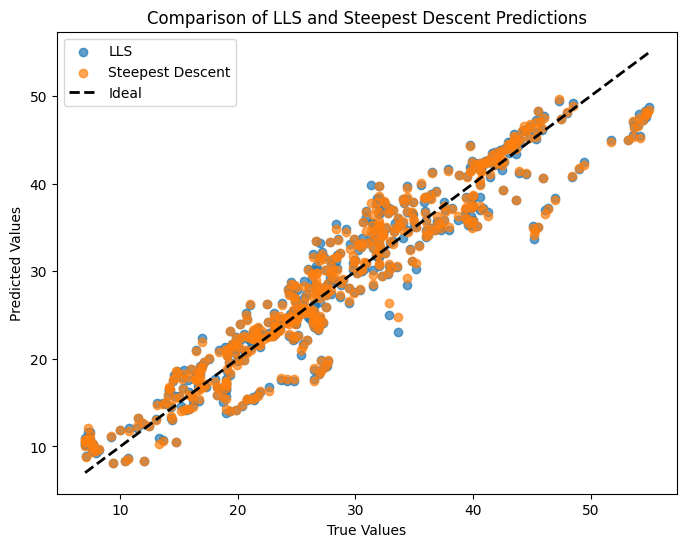

In [21]:

# Function for steepest descent
def steepest_descent(X, y, num_iterations=1000):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)                         # Initialize weights to zeros

    for iteration in range(num_iterations):

                                                              # Calculate the gradient of the cost function
        gradient = -2 * np.dot(X.T, y) + 2* X.T @ X @ weights

                                                               # Evaluate the Hessian matrix
        hessian = 2 * np.dot(X.T, X)

        # Update weights using the steepest descent formula
        weights -=  np.linalg.norm(gradient)**2 / (gradient.T @ hessian @ gradient) * gradient

    return weights

# Apply steepest descent to obtain weights
w_hat_steepest = steepest_descent(X_tr_norm.to_numpy(), y_tr_norm.to_numpy())

# Use the obtained weights to make predictions on the test set
y_hat_te_norm_steepest = np.dot(X_te_norm.to_numpy(), w_hat_steepest)
y_hat_te_steepest = y_hat_te_norm_steepest * sy + my

# Compare LLS and Steepest Descent
plt.figure(figsize=(8, 6))
plt.scatter(y_te, y_hat_te, label='LLS', alpha=0.7)
plt.scatter(y_te, y_hat_te_steepest, label='Steepest Descent', alpha=0.7)
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'k--', linewidth=2, label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Comparison of LLS and Steepest Descent Predictions')
plt.show()


$\nabla f(x)=-2x^Ty+2x^Txw$ 

$H(x)=2x^Tx$

$\gamma_i=\frac{||\nabla f(x_i)||^2}{\nabla f(x_i)^T H(x_i)\nabla f(x_i)}$

$x_(i+1)=(x_i)-\frac{||\nabla f(x_i)||^2 } {\nabla f(x_i)^T H(x_i)\nabla f(x_i)}*\nabla f(x_i)$

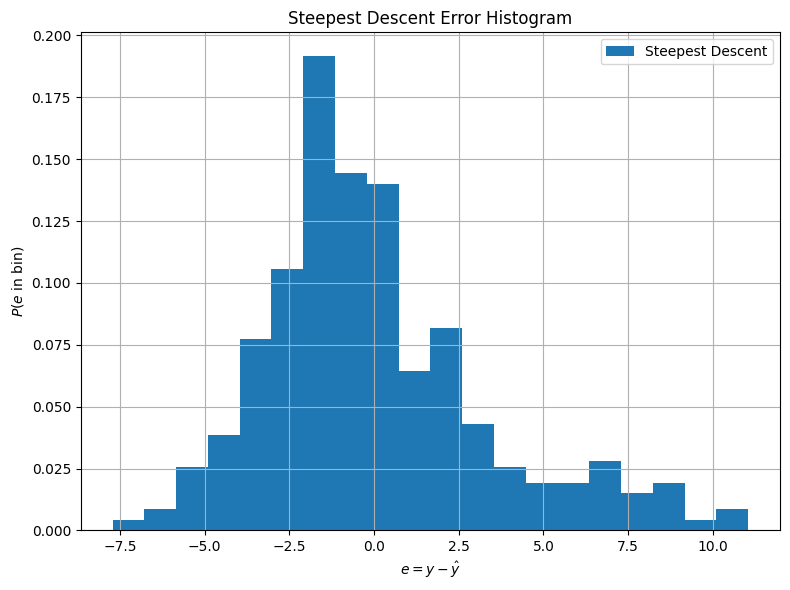

In [22]:

# Plot histogram of errors for steepest descent
E_te_steepest = y_te - y_hat_te_steepest
plt.figure(figsize=(8, 6))
plt.hist(E_te_steepest, bins=20, density=True, histtype='bar', label='Steepest Descent')
plt.xlabel(r'$e=y-\hat{y}$')
plt.ylabel(r'$P(e$ in bin$)$')
plt.legend()
plt.grid()
plt.title('Steepest Descent Error Histogram')
plt.tight_layout()
plt.show()




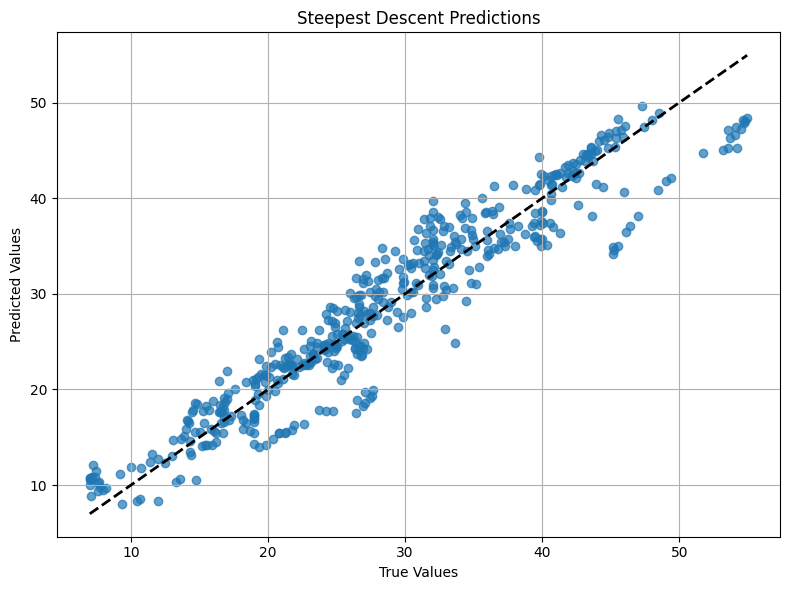

In [23]:
# Scatter plot of predicted vs. true values for steepest descent
plt.figure(figsize=(8, 6))
plt.scatter(y_te, y_hat_te_steepest, alpha=0.7)
plt.plot([y_te.min(), y_te.max()], [y_te.min(), y_te.max()], 'k--', linewidth=2, label='Ideal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Steepest Descent Predictions')
plt.grid()
plt.tight_layout()
plt.show()